In [3]:
import pandas as pd

#chargement du fichier excel
df = pd.read_excel("census.xlsx")

In [4]:
df.columns
# df.info

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'classe'],
      dtype='object')

In [5]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
0,41,State-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,more
1,50,Private,Masters,Divorced,Sales,Not-in-family,White,Female,50,United-States,more
2,24,Private,7th-8th,Separated,Machine-op-inspct,Own-child,White,Male,40,United-States,less
3,27,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Female,40,United-States,less
4,50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,less


In [6]:
var_quan = df[['age', 'hours_per_week']]
var_qual = df[['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country',
       'classe']]

In [7]:
var_quan.describe()

,age,hours_per_week
count,48842.000000,48842.000000
mean,38.643585,40.422382
std,13.710510,12.391444
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [8]:
var_qual.describe(include=['object'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,classe
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,less
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


In [9]:
#proportion des hommes
# df.loc[df['sex']=='Male'].shape

res = df['sex'].value_counts()['Male']/ df.shape[0]
res

0.6684820441423365

In [10]:
#proportions de classe=more
res = df['classe'].value_counts()['more']/ df.shape[0]
res

0.23928176569346055

<Axes: xlabel='marital_status'>

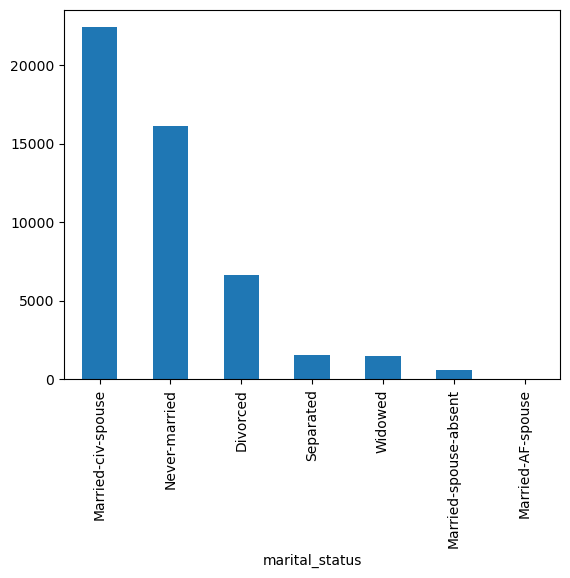

In [11]:
#diagramme en bande de  martial_status
df['marital_status'].value_counts().plot.bar()

<Axes: xlabel='relationship'>

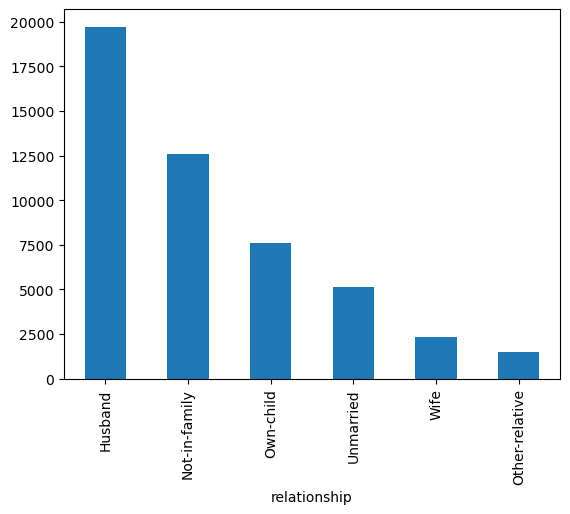

In [12]:
#diagramme en bande de  relationship

df['relationship'].value_counts().plot.bar()

<Axes: ylabel='count'>

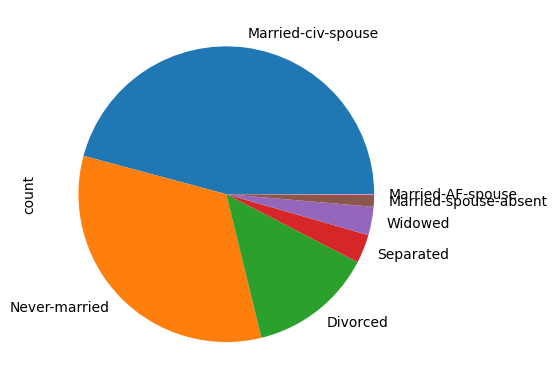

In [13]:
#diagramme en  de  martial_status
df['marital_status'].value_counts().plot.pie()

<Axes: ylabel='count'>

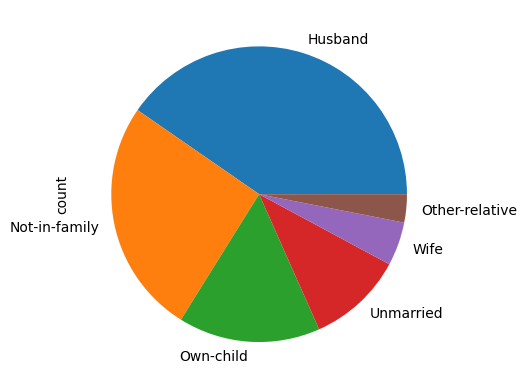

In [14]:
#diagramme en  de  martial_status
df['relationship'].value_counts().plot.pie()

In [15]:
#élaboration du tableau de contingence permettant de faire des croisements;
import pandas as pd

df_contingence = pd.crosstab(index=df['classe'], columns=df['sex'], normalize='columns')
df_contingence

sex,Female,Male
classe,,
less,0.890749,0.696233
more,0.109251,0.303767


In [16]:
df_contingence2 = pd.crosstab(index=df['relationship'], columns=df['marital_status'])
df_contingence2

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
relationship,,,,,,,
Husband,0,12,19704,0,0,0,0
Not-in-family,3628,0,23,330,7114,637,851
Other-relative,181,1,201,54,920,79,70
Own-child,455,1,143,61,6750,146,25
Unmarried,2369,0,0,183,1333,668,572
Wife,0,23,2308,0,0,0,0


In [33]:
#calcul du KHI2
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [27]:
df['age'].describe()
mean = df['age'].describe()["mean"]
std = df['age'].describe()["std"]

mean, std

(38.64358543876172, 13.710509934443207)

In [30]:
#centrage et réduction de la variable age
age = df[['age']]
center_age = (age-mean)/std
print(f"age : {age}")
print(f"center age: {center_age}")

age :        age
0       41
1       50
2       24
3       27
4       50
...    ...
48837   57
48838   31
48839   37
48840   20
48841   20

[48842 rows x 1 columns]
center age:             age
0      0.171869
1      0.828300
2     -1.068055
3     -0.849245
4      0.828300
...         ...
48837  1.338857
48838 -0.557498
48839 -0.119878
48840 -1.359802
48841 -1.359802

[48842 rows x 1 columns]


In [37]:
#calcul de la médiane et des quartiles
import numpy as np

mediane = np.median(age)

q25, q75 = np.percentile(age, 25), np.percentile(age, 75)

print(f"mediane : {mediane}, interval quartile : {q25} - {q75}")

mediane : -0.11987777599961788, interval quartile : -0.7763085027219275 - 0.6824264455498716


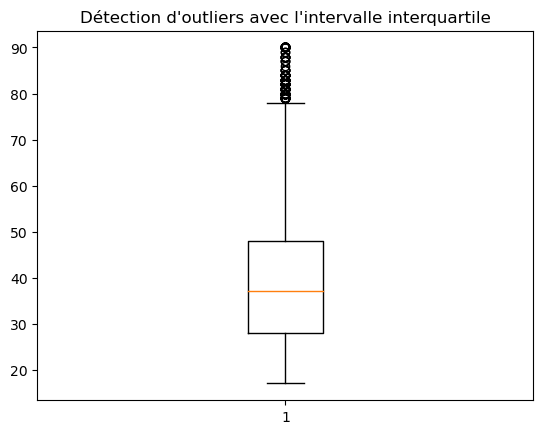

In [41]:
#construction du diagramme boxplot
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(age)
plt.title("Détection d'outliers avec l'intervalle interquartile")
plt.show()

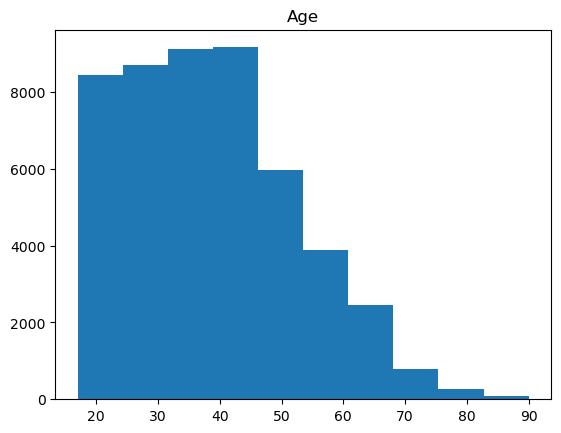

In [43]:
plt.figure()
plt.hist(age)
plt.title("Age")
plt.show()

indice de correlation 0.0715583385269839


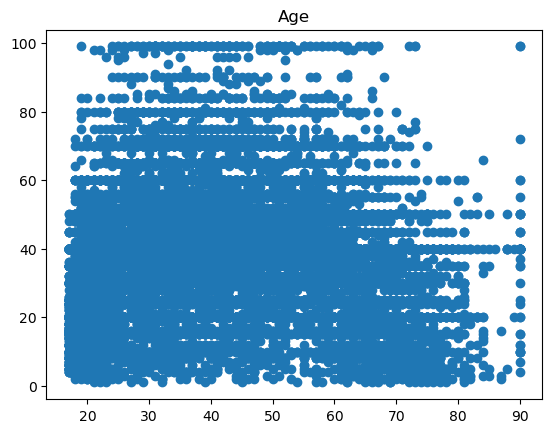

In [54]:
#calcul de l'indice de correlation
id_corr = df['age'].corr(df["hours_per_week"])
print(f"indice de correlation {id_corr}")
plt.figure()
plt.scatter(x=df['age'], y=df["hours_per_week"])
plt.title("Age")
plt.show()

<Axes: title={'center': 'age'}, xlabel='relationship'>

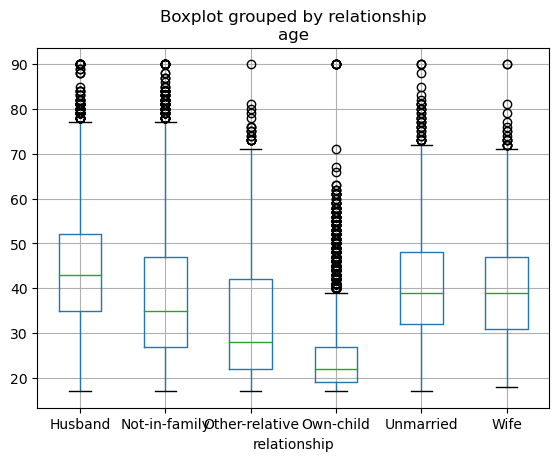

In [56]:
df.boxplot(column="age", by="relationship")

In [63]:
#calcul de la moyenne conditionnel 
cond_mean = df.pivot_table(index=["relationship"], values=["age"], aggfunc= pd.Series.mean)
print(cond_mean)
#le calcul confirme bel et bien l'impression du boxplot précédent

                      age
relationship             
Husband         43.906066
Not-in-family   38.421601
Other-relative  33.420983
Own-child       24.794090
Unmarried       40.312195
Wife            40.078507


In [82]:
#Q19) calcul du carré de corrélation entre age(Y) et relationship(X)
import numpy as  np
Y = df['age']
X = df['relationship']
#calcul des effectifs conditionnels  de Y par X
cond_count = df.pivot_table(index=["relationship"], values=["age"], aggfunc= pd.Series.count)

SCE = np.sum(cond_count.values[:,0]*(cond_mean.values[:,0]-Y.describe()["mean"])**2)
print(SCE)

SCT = np.sum((Y.values- Y.describe()["mean"])**2)
print(SCT)

n = SCE/SCT

print("carré du rapport de corrélation : {}".format(n))

2060875.2986547474
9181037.535317963
carré du rapport de corrélation : 0.22447084991504437


In [99]:
#Q20)
personne_instruite = df.loc[df["education"].isin(["Bachelors", "Masters", "Prof-school", "Doctorate"])]
nb = personne_instruite.shape[0]

print("nombre de valeurs correspondandent :  {}".format(nb))

nombre de valeurs correspondandent :  12110


In [115]:
#Q21)

cls_more = personne_instruite.loc[personne_instruite['classe'] == 'more'].shape

print("proportion de classe more : {}".format(cls_more[0]/nb))

personne_non_instruite = df.loc[~df["education"].isin(["Bachelors", "Masters", "Prof-school", "Doctorate"])]
print(personne_non_instruite.head())

n_cls_more = personne_non_instruite.loc[personne_non_instruite['classe'] == 'more'].shape

print("proportion de classe more (pour les non instruit): {}".format(n_cls_more[0]/nb))

pd.crosstab(index=personne_instruite, columns=df['classe'], normalize="index")


proportion de classe more : 0.4805945499587118
   age         workclass     education      marital_status         occupation  \
2   24           Private       7th-8th           Separated  Machine-op-inspct   
3   27       Without-pay       HS-grad       Never-married    Farming-fishing   
4   50           Private       HS-grad  Married-civ-spouse       Craft-repair   
6   43  Self-emp-not-inc  Some-college  Married-civ-spouse    Farming-fishing   
9   55       Federal-gov  Some-college       Never-married       Adm-clerical   

  relationship   race     sex  hours_per_week native_country classe  
2    Own-child  White    Male              40  United-States   less  
3    Own-child  White  Female              40  United-States   less  
4      Husband  White    Male              40  United-States   less  
6      Husband  White    Male              60  United-States   more  
9    Unmarried  White    Male              40  United-States   less  
proportion de classe more (pour les non instru

ValueError: 2